<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 8: Data Processing & Cleaning for Data Science: Statistics For Data Science

The purpose of this [Jupyter Notebook] is to getting you familairized with Statistics For Data Science

#  Bayes' law
Use Bayes’ law to calculate the probability of getting a data science job if you’ve gotten an interview for the job. This could be written P(get the DS job | interview). You’ll have to use Bayesian probability methods (your intuition or beliefs) to assign values to the different components of Bayes’ law.

`Hint:`
* Usually the probability of getting a job from applying is very low, around 1%. This is based on experience and reading about how most people apply to 100 jobs in order to get 1 job. 
* P(interview | get job) is 99%. Almost no one will hire someone they didn't interview. 
* P(interview | !get job) will be set to 10%. We might interview 10% of candidates, and only one gets the job.

In [2]:
P_get_job = 0.01  
P_interview_given_get_job = 0.99  
P_interview_given_no_job = 0.10 
P_no_job = 1 - P_get_job  


P_interview = (P_interview_given_get_job * P_get_job) + (P_interview_given_no_job * P_no_job)


P_get_job_given_interview = (P_interview_given_get_job * P_get_job) / P_interview

print("P(interview):", P_interview)
print("P(get the DS job | interview):", P_get_job_given_interview)


P(interview): 0.10890000000000001
P(get the DS job | interview): 0.09090909090909091


#  Probabilities Distributions

Re-test the codes seen in lecture 8 from slide 6 to 18.


(np.float64(14.181805365742568), np.float64(0.4887500401256815))

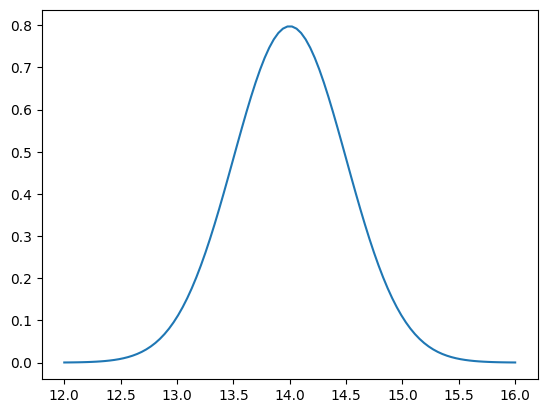

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy
import pandas as pd

x = np.linspace(12, 16, 100)
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))
df= pd.read_csv('data/solar_cell_efficiencies.csv')
scipy.stats.norm.fit(df['efficiency'])


In [4]:
scipy.stats.bernoulli(p=0.7).rvs()

0

In [5]:
r = scipy.stats.uniform.rvs(size=1000)

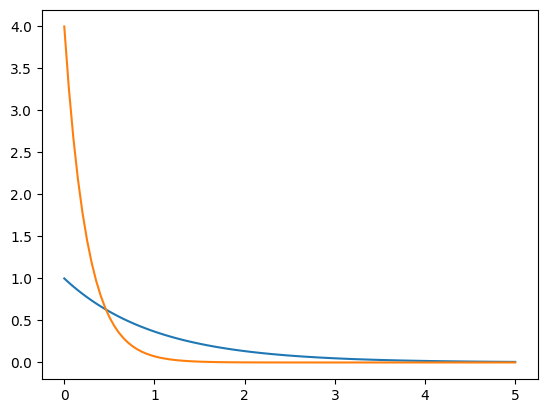

In [6]:

x = np.linspace(0, 5, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1') 
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4') 


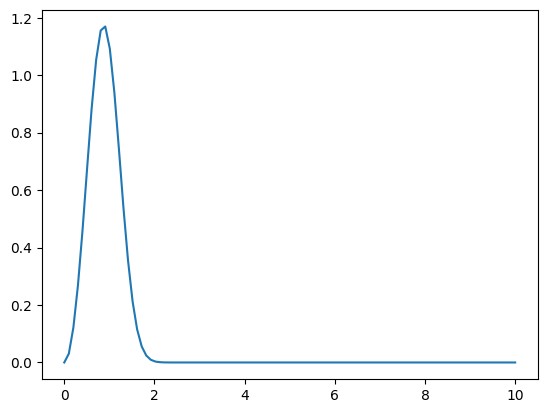

In [7]:
x = np.linspace(0, 10, 100)
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

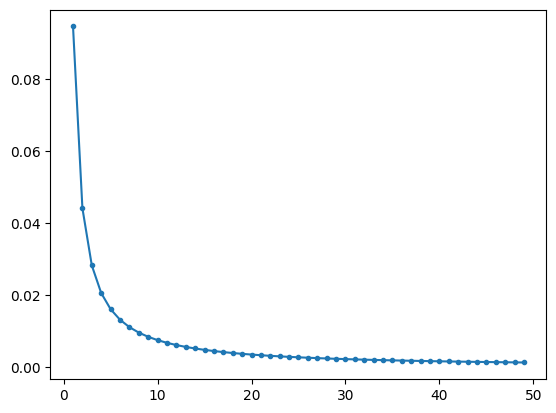

In [8]:
x = range(1, 50)
plt.plot(x, scipy.stats.zipf(a=1.1).pmf(x), marker='.')

In [20]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100,random_state=42)


In [21]:
df.describe

<bound method NDFrame.describe of         efficiency
0        14.260772
1        13.463545
2        14.704418
3        13.671162
4        14.186147
...            ...
187191   14.602182
187192   14.158041
187193   14.093038
187194   14.478059
187195   13.833728

[187196 rows x 1 columns]>

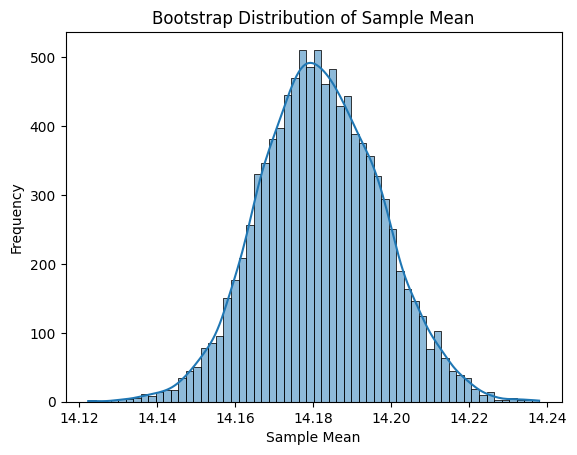

In [10]:
means = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    sample = np.random.choice(df['efficiency'], 1000, replace=True)  # Draw 1000 samples with replacement
    means.append(sample.mean())  # Compute and store the sample mean

# Plot the distribution of the sample means
sns.histplot(means, kde=True)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Sample Mean')
plt.show()

# MISO distributions
Determine the type of distribution and extract the distribution's PDF parameters from the MISO wind power generation data (the MWh column), stored under  data/miso_wind_data.csv. Write a short analysis explaining why you chose that distribution and what the parameters mean.

`Hint:`
Try to fit your data with different probabilities distributions and see what one works better.



<Axes: xlabel='MWh', ylabel='Count'>

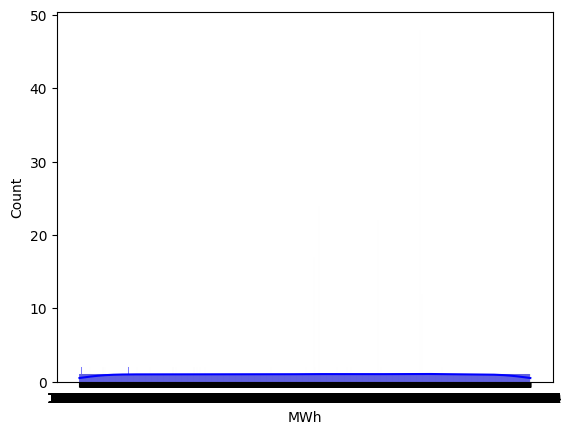

In [11]:
miso = pd.read_csv('data/miso_wind_data.csv')

sns.histplot(miso['MWh'], kde=True, color='b')

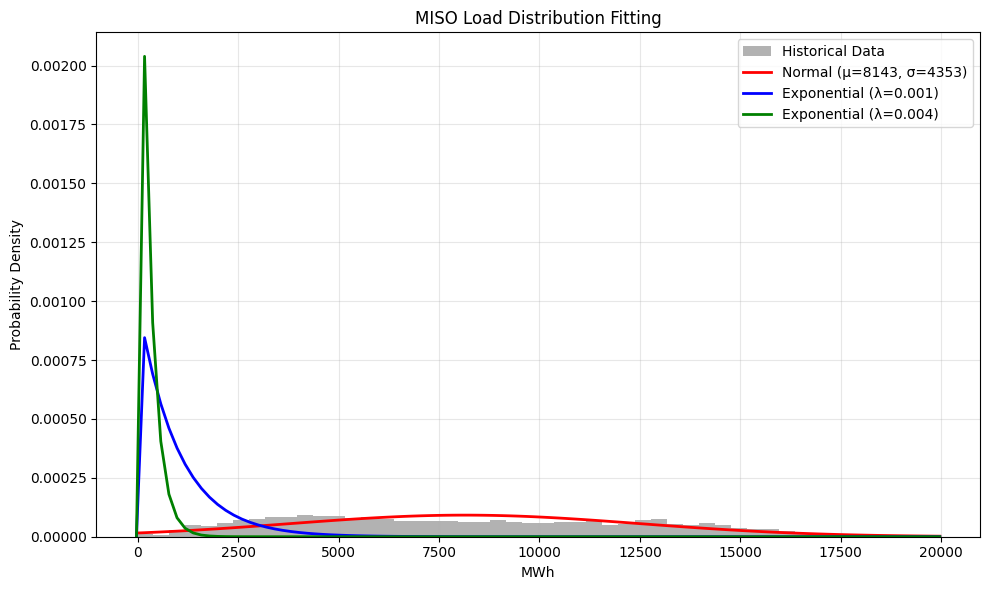

In [42]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
miso_data= miso


mu, std = scipy.stats.norm.fit(miso_data['MWh'])


x = np.linspace(min(miso_data['MWh']), max(miso_data['MWh']), 100)

plt.figure(figsize=(10, 6))

plt.hist(miso_data['MWh'], bins=50, density=True, alpha=0.6, color='gray', label='Historical Data')

plt.plot(x, scipy.stats.norm.pdf(x, mu, std), 'r-', lw=2, label=f'Normal (μ={mu:.0f}, σ={std:.0f})')

scale1 = 1000
scale2 = 250
plt.plot(x, scipy.stats.expon.pdf(x, scale=scale1), 'b-', lw=2, label=f'Exponential (λ={1/scale1:.3f})')
plt.plot(x, scipy.stats.expon.pdf(x, scale=scale2), 'g-', lw=2, label=f'Exponential (λ={1/scale2:.3f})')
plt.xlabel('MWh')
plt.ylabel('Probability Density')
plt.title('MISO Load Distribution Fitting')
plt.legend()
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

Number of valid MWh values: 8761
Number of invalid entries removed: 23


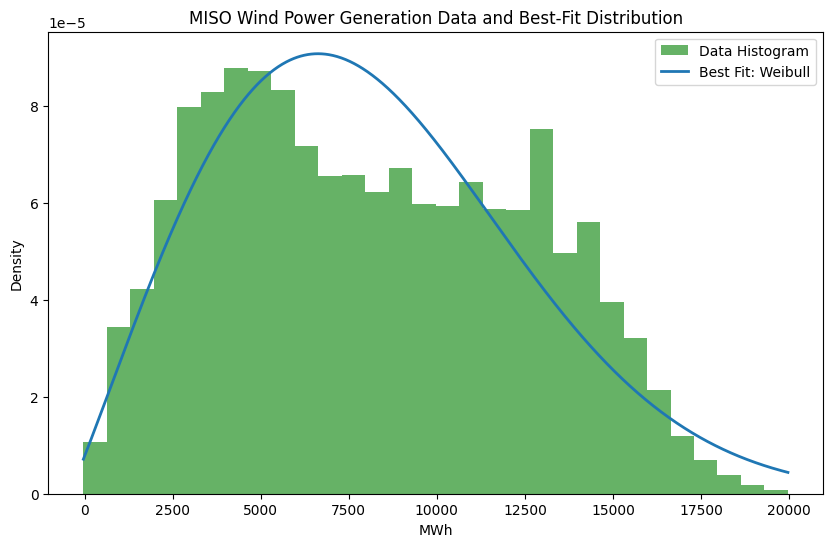

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv('data/miso_wind_data.csv')

mwh_data = pd.to_numeric(data['MWh'], errors='coerce').dropna()
print(f"Number of valid MWh values: {len(mwh_data)}")
print(f"Number of invalid entries removed: {len(data['MWh']) - len(mwh_data)}")

distributions = {
    "Normal": scipy.stats.norm,
    "Exponential": scipy.stats.expon,
    "Weibull": scipy.stats.weibull_min,
}

results = {}
for name, dist in distributions.items():
 params = dist.fit(mwh_data)
 #Kolmogorov-Smirnov test statistic
 ks_stat, p_value = stats.kstest(mwh_data, lambda x: dist.cdf(x, *params))
 results[name] = {"params": params, "ks_stat": ks_stat, "p_value": p_value}


best_fit = min(results, key=lambda x: results[x]["ks_stat"])
best_dist = results[best_fit]

x = np.linspace(mwh_data.min(), mwh_data.max(), 1000)
pdf = distributions[best_fit].pdf(x, *best_dist["params"])

plt.figure(figsize=(10, 6))
plt.hist(mwh_data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
plt.plot(x, pdf, label=f'Best Fit: {best_fit}', linewidth=2)
plt.title('MISO Wind Power Generation Data and Best-Fit Distribution')
plt.xlabel('MWh')
plt.ylabel('Density')
plt.legend()
plt.show()





# Bootstrap Sampling
Apply bootstrap sampling to the MISO wind power generation data and plot the distribution of the mean wind power generation values.

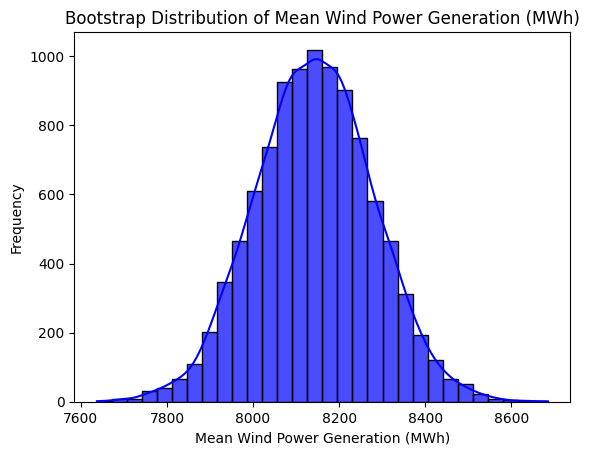

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mwh_data = pd.to_numeric(miso['MWh'], errors='coerce').dropna()


means = []
n_iterations = 10000  
sample_size = 1000    

for _ in range(n_iterations):
    sample = np.random.choice(mwh_data, size=sample_size, replace=True)
    means.append(sample.mean())

sns.histplot(means, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Bootstrap Distribution of Mean Wind Power Generation (MWh)')
plt.xlabel('Mean Wind Power Generation (MWh)')
plt.ylabel('Frequency')
plt.show()
